# PHY 364 Computational Physics & Modeling Project - The Ising Model (PRJ1)

## Author: JS Potgieter - 18068911

### Introduction:

The aim of this project is to simulate and analyze parameters of The Ising Model for a ferromagnet. The model we will consider is a 2-dimensional square lattice with side-length N. The lattice contains a particle at every integer point in the lattice - giving a total of $N^2$ particles. We will assume that every particle has a spin $S$ that can either be in the +1 (up) or -1 (down) state.

We will consider the particles to only interact with their four nearest neigbours - to the left and right plus to the top and bottom. The energy of a single particle in state $S_i$ is then given by

$$ E_i = -J\sum_{i,j_i}{S_i}\cdot S_{j_i} \tag 1$$

where $j_i$ indicates the 4 nearest neighbours to $i$. We will only consider the case of $J > 0$ and thus choose it to be 1 - which is the case for ferromagnetic interaction.

The total energy of the system can then be found by adding the above energy for all $i$ - for all $N^2$ particles.

We will study the thermodynamic behaviour of this specified model by making use of the Metropolis method - which will be expanded upon in the section below.

### Method & Implementation:

#### - Theoretical method:

We wish to analyze thermodynamic properties of our system, for this we will need to consider the system at different temperatures and make use of averages over many iterations.

In statistical mechanics, it is convenient to evaluate thermodynamic averages of the form

$$ y = \frac{\sum_i y_i e^{-\beta E_i}}{\sum_i e^{-\beta_i}} \tag 2$$

where $E_i$ is the energy of the system in state $i$ and $\beta=\frac{1}{k_b T}$ - with $T$ being the temperature of the system.

We will consider our system to be in an initial state of $i$ and state $j$ to be a possible transition state. From conditions for equilibrium the flow from $i$ to $j$ must be balanced by the flow from $j$ to $i$. From this we obtain that

$$ p_iT_{i->j} = p_jT_{j->i} $$

giving us that

$$ \frac{T_{i->j}}{T_{j->i}} = \frac{p_j}{p_i} = e^{-\beta(E_i-E_j)} \tag 3$$,

where $p_i$ and $p_j$ are the probabilities of finding the system in those states and $T_{i->j}$ and $T_{i->j}$ the transition probabilities.

We want to choose $\beta$ as our independant parameter (we will consider the range $0.05<\beta<0.8$) to consider the change of temperature. For a single particle we know the local energy $E_i$ from (1) and the only transition possible for that state is a spin flip, giving that $E_j$ is the energy of particle $i$ when flipped.

We can also choose the transition rates s.t.

$$ T_{i->j} = \begin{cases} 
      1 & \text{if}\space E_j < E_i \\
      e^{-\beta(E_i-E_j)} & \text{if}\space E_j > E_i 
   \end{cases}
\tag{4}$$.

Thus, for a specific $\beta$ we will choose a particle at random in our lattice. We can determine its local energy from (1) in the intital state $i$. We then flip the spin of the particle and determine the new local energy in state $j$. We then follow (4) to decide whether to keep the transiton or go back. For the case of $E_j > E_i$, a random number $r$, between 0 and 1, will be generated and the flipped state $j$ will be kept if $r < e^{-\beta(E_i-E_j)}$.

The above process will be repeated about 100 000 times for a specific $\beta$, each time considering a new random particle in the lattice. The first 60 000 itterations will be specifically for the system to reach equilibrium and the last 40 000 to determine the thermodynamic averages - which will be expanded upon in the Results & Analysis section.

#### - Implementation specifics:

I chose to make use of c++ for the implementation of the method above. I utilized a 2D dynamic array (for different values of N) of booleans (true for up and false for down) to represent the lattice. The first lattice (beta of 0.05) is initialized with random spins throughout, with the preceding ones being initialized with the equilibrium configurations of the previous beta (through a class copy constructor).

When executed, the program prints the equilibrium lattice configurations for all $0.05 <= beta <= 0.8$ with increments of $0.05$ - for the prints 'X' is up and 'O' is down. The calculated thermodynamic averages are printed in lists for every beta at the end.

The necessary files to inspect and compile/execute the program/code will be attached. A makefile is available, so one can simply use 'make' to compile and 'make run' to execute the program executable. An already compiled executable will also be included, in case the necessary compilers aren't present on the system.

In the main.cpp, the value for $N$ and $J$ can be changed to consider different systems. The lattice class also contains methods to initialize the first array to either only up or only down, with random as default.

### Results & Analysis:

In this section we will have a look at the statistics that are obtained from the thermodynamic averages of our simulated system at different $\beta$ - remembering that $\beta = \frac{1}{k_B T}$, it is clear that small $\beta$ correspond to high temperatures and high $\beta$ to low temperatures.

All the averages that are to follow are calculated over the last 40 000 of the 100 000 itterations.

The first property we wish to look at is the average energy of the system $<E>$ for different $\beta$ - it is plotted below.

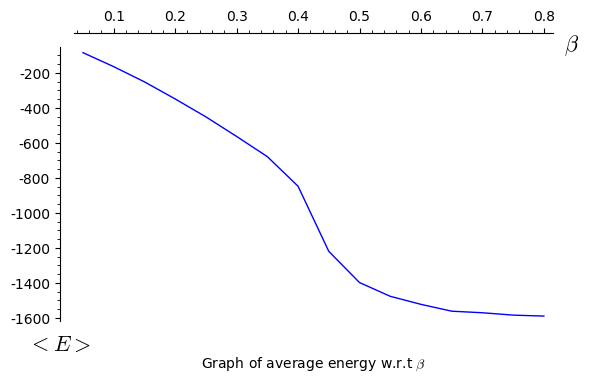

In [16]:
# plot for average energy of system w.r.t beta
averageEnergy = [-84.9863,-164.888,-251.663,-349.333,-451.576,-563.459,-678.79,-847.969,-1219.98,-1398.14,-1476.64,-1522.63,-1561.64,-1570.61,-1584.08,-1589.59]
beta = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80]

energyPoints = []
for i in range(0, 16):
    energyPoints.append((beta[i], averageEnergy[i]))
    
line(energyPoints, title=r'Graph of average energy w.r.t $\beta$', axes_labels=[r'$\beta$',r'$<E>$'], title_pos=(0.5,-0.2))

The first noticeable aspect of the obtained average energy graph is the verticle drop/spike at around after $\beta = 0.4$. This is the first indication of a phase transition in our system at a certain critical temperature - as the temperature declines. We remember from classical thermodynamics that at a phase transition the temperature remains constant, with the energy going into the phase transition and not a change in temperature. We also see the graph flatten at around -1600, as this is the maximum energy the system can obtain - since the only energy we consider is that of the spins.

In the physical prints of the lattice structures by the program, the phase transition is also visible as "chunks" of either up or down spins in a uniform lattice of the opposite spin.

Next we will look at the average magnetisation for the different beta. The magnitisation of a specific state can be calculated as follows

$$ M = \frac{1}{N^2}\sum_i S_i \tag 5 $$,

where $S = \sum_i S_i$ is simply the sum of all the spins in the current state.

We thus have that the average magnetisation is given by

$$ <M> = \frac{1}{N^2}<S> \tag 6$$.

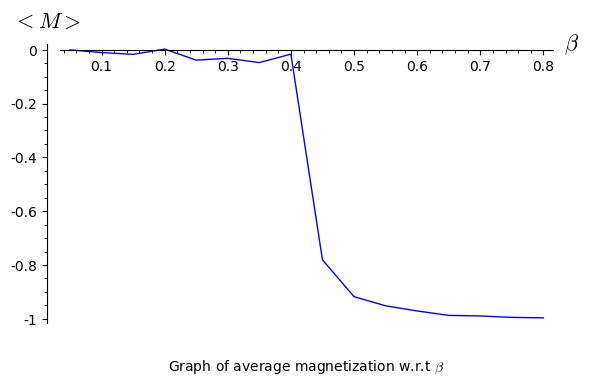

In [18]:
# plot for average magnetisation w.r.t beta
averageMagnetisation = [-0.000717143,-0.0106818,-0.0173796,0.00222218,-0.0387865,-0.0321263,-0.0479499,-0.01662,-0.780939,-0.917779,-0.951729,-0.970852,-0.987436,-0.98955,-0.99486,-0.996572]

magnetisationPoints = []
for i in range(0, 16):
    magnetisationPoints.append((beta[i], averageMagnetisation[i]))
    
line(magnetisationPoints, title=r'Graph of average magnetization w.r.t $\beta$', axes_labels=[r'$\beta$',r'$<M>$'], title_pos=(0.5,-0.2))

Our average magnetisation graph firstly shows a near zero magnetisation for small beta, up until the critical temperature. It makes sense for it to be very small here, as the spins are still mostly randomly ordered - the net spin is close to zero. The rapid decrease after the ciritical temperature occurs due to the phase transition where a spicific spin (in our case the down spin) starts the be in the majority. It flattens out at the minimum of -1.

Next we will have a look at the heat capacity of the system as a function of beta once more. In this case it is not an average itself, but rather an indication of the deviation of the average energy.

The heat capacity is determined as follows

$$ C_V = \frac{1}{N^2}(J\beta)^2(<E^2> - <E>^2) \tag 7 $$.

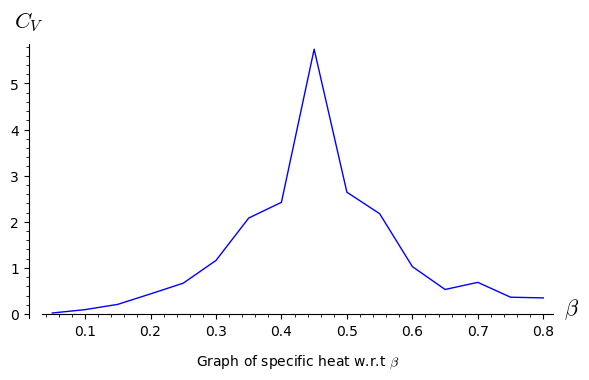

In [23]:
# plot for specific heat w.r.t beta
specificHeat = [0.020887,0.093985,0.208336,0.434977,0.667763,1.15992,2.08009,2.42083,5.74168,2.64038,2.17498,1.02731,0.531167,0.68527,0.363484,0.348324]

specificHeatPoints = []
for i in range(0, 16):
    specificHeatPoints.append((beta[i], specificHeat[i]))
    
line(specificHeatPoints, title=r'Graph of specific heat w.r.t $\beta$', axes_labels=[r'$\beta$',r'$C_V$'], title_pos=(0.5,-0.2))

The next property, susceptibility, is also an indication of the deviation, but this time rather of the average magnetisation.

The susceptibility is calculated as follows

$$ \chi = \frac{J\beta}{N^2}(<S^2> - <S>^2) \tag 8 $$.

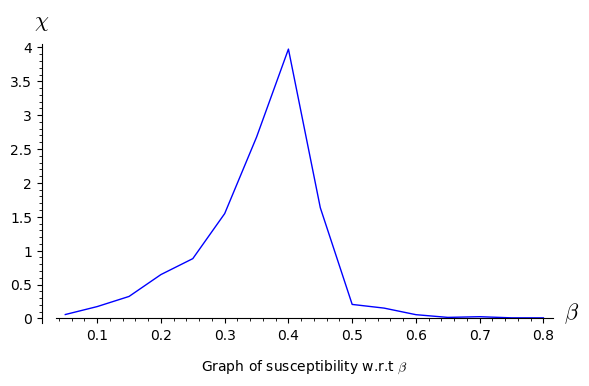

In [22]:
# plot for susceptibility w.r.t beta
susceptibility = [0.0573107,0.174501,0.324305,0.647012,0.882368,1.54684,2.67553,3.97505,1.63381,0.206448,0.152113,0.0550952,0.0150227,0.025187,0.0084174,0.00801028]

susceptibilityPoints = []
for i in range(0, 16):
    susceptibilityPoints.append((beta[i], susceptibility[i]))
    
line(susceptibilityPoints, title=r'Graph of susceptibility w.r.t $\beta$', axes_labels=[r'$\beta$',r'$\chi$'], title_pos=(0.5,-0.2))

We observe that both the $C_V$ and $\chi$ spike/diverge around the critical temperature and stage of phase transformation. This is to be expected, as these quantities are variences of properties that will have large fluctuations at the phase transition. They also tend to approximately zero at the end, as the system stabilizes at this point. 

### Conclusion:

From our obtained statistical graphs and analysis, we can conclude that we were able to successfully implement a ferromagnetic Ising Model with a clear phase transition. The phase transition is also clearly shown by the visual prints of the system by the program. The obtained thermodynamic averages of the system also behave as expected - especially around the critical temperature.

We obtain a smooth continuous graph for the total energy w.r.t beta, which shows the effectiveness of making use of averages over a large number of iterations.

Something I would also like to mention, which is not relevant to the physics of the problem, is that I perceive the use of c++ and choice of data types (boolean values for the lattice) to have made a resonably positive contribution to the effeciency of the simulation. The compilation and execution time of the model is quite fast for the number of iterations and calculations that are performed - which I believe will by far out perform Sagemath (python). The c++ random generator[2] also seems to be effective enough (correct distribution for equal probability) for the used method.

### References:

- [1] Metropolis N, Rosenbluth A W, Rosenbluth M N, Teller A H & Teller E, J.
Chem. Phys. 21 (1953) 1087.
- [2] "rand - C++ Reference", Cplusplus.com, 2020. [Online]. Available: http://www.cplusplus.com/reference/cstdlib/rand/. [Accessed: 01- Oct- 2020]